<a href="https://colab.research.google.com/github/MilagrosContrera/Gradient-descent/blob/main/TI_1_Assignment0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 0

**Name:** Milagros Contreras Elizalde

**e-mail:** -- milagros.contreras8430@alumnos.udg.mx --

# MODULES

In [138]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Theory on the Gradient Descent algorithm

We will use the gardient descent algorithm to find a local minimum of a 2D function, in this case, the *Sphere function*.

Formula:


$$f(x, y) = x^2 + y^2$$

Global minimum:

$$f(x_1,...,x_n)= f(0,...,0)=0$$



The Sphere function has a global minimum at $((0, 0))$, where $(f(x, y) = 0)$, making it an ideal function for demonstrating gradient descent.




In [139]:
# Function to be optimized
# Sphere function
def f_sphere(x, y):
    return x**2 + y**2

# Gradient of the sphere function
def df_sphere(x, y):
    df_dx = 2 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])


In [140]:
# Function to calculate gradient descent
def gradient_descent(xy_point, learning_rate, num_iterations): # xy_point is the current point,
    points = [xy_point]
    for _ in range(num_iterations):
        gradient = df_sphere(xy_point[0], xy_point[1])
        xy_point = xy_point - learning_rate * gradient
        points.append(xy_point)
    return np.array(points) #This array contains all the points visited during the gradient descent process

#Create a grid of points for the surface
x_range = np.arange(-15, 15, 0.1)
y_range = np.arange(-15, 15, 0.1)
X, Y = np.meshgrid(x_range, y_range)
Z = f_sphere(X, Y)

# Inicial point
x_ini, y_ini = 12.0, 10.0
z_ini = f_sphere(x_ini, y_ini)


In [141]:
# run the gradient descent
points = gradient_descent(np.array([x_ini, y_ini]),
                          learning_rate=0.1,
                          num_iterations=50)

# Get the function values ​​at the found points
z_points = f_sphere(points[:, 0], points[:, 1])

In [142]:
#Value last point
(points[-1, 0], points[-1, 1])


(0.0001712697231247153, 0.00014272476927059603)

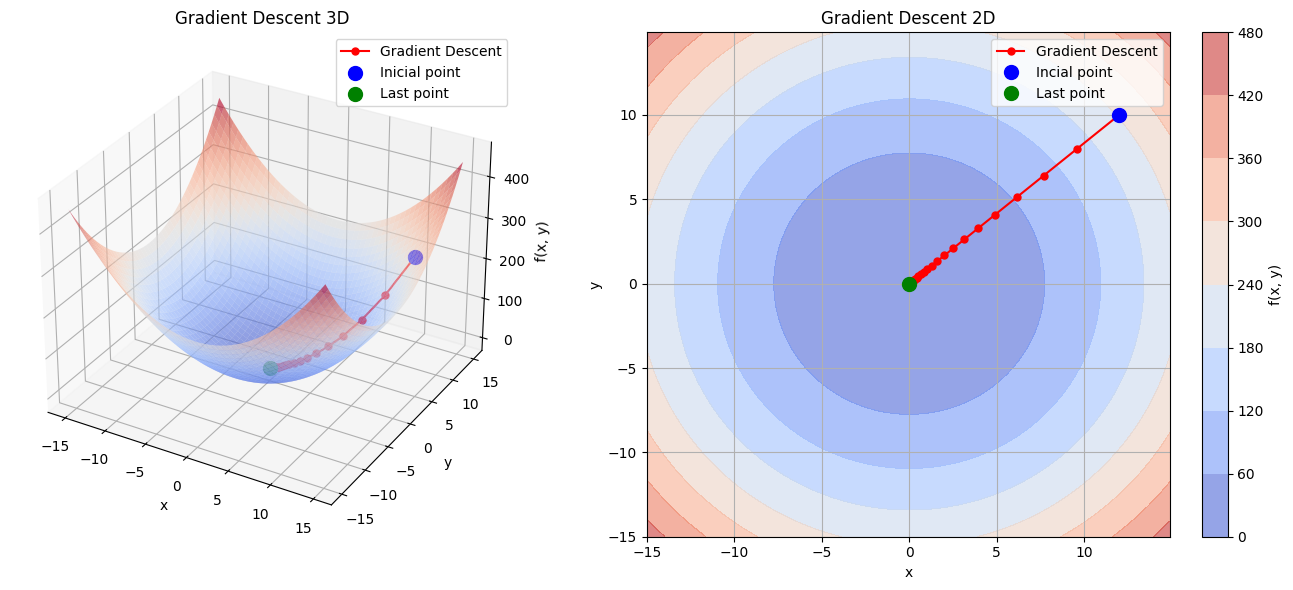

In [143]:
# Plot the results
# Graphing the function and gradient descent in 3D
fig = plt.figure(figsize=(14, 6))

# 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.6)
ax1.plot(points[:, 0], points[:, 1], z_points, 'ro-', label="Gradient Descent", markersize=5)
ax1.scatter(x_ini, y_ini, z_ini, color='blue', s=100, label="Inicial point")
ax1.scatter(points[-1, 0], points[-1, 1], z_points[-1], color='green', s=100, label="Last point")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title("Gradient Descent 3D")
ax1.legend()

# 2D
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X, Y, Z, cmap='coolwarm', alpha=0.6)
plt.colorbar(contour, ax=ax2, label='f(x, y)')
ax2.plot(points[:, 0], points[:, 1], 'ro-', label="Gradient Descent", markersize=5)
ax2.plot(x_ini, y_ini, 'bo', markersize=10, label="Incial point")
ax2.plot(points[-1, 0], points[-1, 1], 'go', markersize=10, label="Last point")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title("Gradient Descent 2D")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


**Explanation of the implemented gradient descent methodology**

The gradient of this function is the vector of partial derivatives with respect to \(x\) and \(y\):

$$\nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) = (2x, 2y)$$


This gradient indicates the direction of the steepest increase, so by moving in the opposite direction (that is, subtracting the gradient), we achieve the steepest decrease. This concept is central to the gradient descent algorithm.

The gradient descent algorithm starts from an initial point and iteratively moves towards the minimum of the function by following the negative of the gradient. The update rule for the position is:

$$new point= current point − learning rate ( \nabla f(currentpoint))$$

So we can say that the gradient descent algorithm consists of the following steps:


*   *Select Initial Point*, choose an initial point randomly (the initialization points).
*   *Calculate the Gradient* at the current point
*   *Update the Point*, determine the next point according to the previous formula
*   The algorithm stops when it reaches the predetermined number of iterations

Two important parameters in this algorithm are the learning rate, since if you have a very high value it will take very large steps, it is important to modify it according to the function you have, as well as the number of iterations.





If we change the Sphere function to:

$$f(x,y)= x^2+y^2+2$$

the new minimum value of the function will be 2.


On the other hand, if we change the function to:

$$f(x,y)=x^2+y^2-1$$

the minimum value of the function will be -1.


## References



*   colaboradores de Wikipedia. (2024, April 20). Descenso del gradiente. Wikipedia, La Enciclopedia Libre. https://es.wikipedia.org/wiki/Descenso_del_gradiente
*   Wikipedia contributors. (2023, December 29). Test functions for optimization. Wikipedia. https://en.wikipedia.org/wiki/Test_functions_for_optimization
*  OMES. (2024, May 9). Gradiente descendente 🤖🧠 [Video]. YouTube. https://www.youtube.com/watch?v=AgcxEH2uGR8

